In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist##fashion 데이터 가져오기
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()#데이터 나누기

In [2]:
print(train_images[0])#이미지 데이터 출력해보기

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [3]:
print(train_labels[0])##라벨 출력

9


In [4]:
print(train_images.shape)##데이터 구조 확인 6만개 훈련데이터셋 
print(train_labels.shape)##테스트 1만개 이미지데이터는 28*28
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


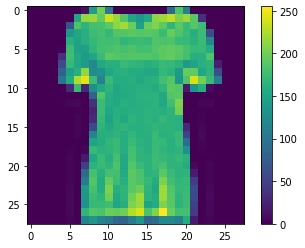

In [6]:
plt.figure()##데이터 그려보기
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()


In [8]:
train_images = train_images /255.0##신경망 모델에 넣기전에 픽셀 값 범위를
test_images = test_images / 255.0##0~1사이로 조정해야됌

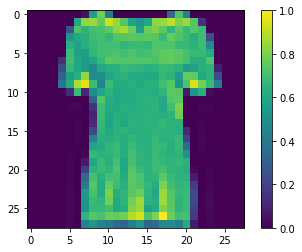

In [9]:
plt.figure()#다시한번 그려보기
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])


In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 1s 597us/step - loss: 0.4977 - accuracy: 0.8237
Epoch 2/8
1875/1875 [==============================] - 1s 597us/step - loss: 0.3748 - accuracy: 0.8656
Epoch 3/8
1875/1875 [==============================] - 1s 656us/step - loss: 0.3363 - accuracy: 0.8769
Epoch 4/8
1875/1875 [==============================] - 1s 653us/step - loss: 0.3143 - accuracy: 0.8842
Epoch 5/8
1875/1875 [==============================] - 1s 645us/step - loss: 0.2951 - accuracy: 0.8915
Epoch 6/8
1875/1875 [==============================] - 1s 631us/step - loss: 0.2821 - accuracy: 0.8953
Epoch 7/8
1875/1875 [==============================] - 1s 643us/step - loss: 0.2691 - accuracy: 0.8997
Epoch 8/8
1875/1875 [==============================] - 1s 655us/step - loss: 0.2589 - accuracy: 0.9041


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test accuracy : ', test_acc)

313/313 [==============================] - 0s 667us/step - loss: 0.3481 - accuracy: 0.8794
test accuracy :  0.8794000148773193


In [16]:
predictions = model.predict(test_images)

In [24]:
print(predictions[1])

[1.1054342e-05 6.1157790e-13 9.9943179e-01 6.3331070e-11 4.8409367e-04
 2.0319674e-13 7.3071955e-05 9.7722487e-19 1.2284667e-11 7.8161973e-15]


In [23]:
print([round(p, 4) for p in predictions[1]])

[0.0, 0.0, 0.9994, 0.0, 0.0005, 0.0, 1e-04, 0.0, 0.0, 0.0]


In [25]:
test_labels[1] #정답

2

In [ ]:
#cnn 구조이해
#이미지 데이터는 기본적으로 3차원 MNIST의 경우(28*28)인데 왜 3차원??-
#->사실 28*28*컬러 채널 수(흑백의 경우 28*28*1)
#일반적으로 RGB 세개의 채널 강도를 가지고 있으므로 사실 a*b*c의 3차원 구조를 가지고있다



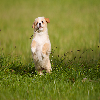

In [61]:
from keras.preprocessing import image
img = image.load_img('dog.jpg', target_size = (100, 100))
img

In [58]:
img = image.img_to_array(img)##아래와 같이 케라스로 이미지를 불러온후 형태를 확인하면
print(img.shape)##3차원인것을 확인가능

(100, 100, 3)


In [ ]:
#이미지 데이터는 3차원인데, 실제 케라스와 텐서플로에서 이미지 데이터를 다루기 위한
#텐서의 모양을 출력하면 4차원의 구조를 가지고 있다.
#이는 Mini-batch SGD를 가용하기 때문이라함
#4차원 텐서의 형태를 확인해보면 (samples,rows,cols,channels)로 구성됌
#따라서 경사 하강법으로 학습할때는 넘파이 배열이 위에와 같은 형태로 입력된다.
#따라서 이미지데이터와 이미지 텐서의 차이에 혼란 주의!

In [ ]:
#cnn 구조
#핵심 구조: 합성곱 레이어(CONV)와 풀링레이어(POOL)
#합성곱 레이어에서는 convolution연산,풀링레이어에선 pooling 연산
#그리고 패딩(padding)과필터(filter),혹은 커널(kernel)이라는 개념이 중요

In [ ]:
#합성곱이란??? 두개 함수 fg가있을때 수학기홀는 f*g라고 표시
#합성곱연산은 두 함수 f,g 가운데 하나의 함수를 반전,전이시킨 다음,다른하나의 함수와
#곱한 결과를 적분하는 것을 의미

In [ ]:
#풀링연산이란?? 2차원데이터의 세로 및 가로 방향의 공간을 줄이는 연산
#풀링의 종류에는 최대 풀링,평균풀링등이 있다.
#최대 풀링은 대상 영역에서 최댓값을 취하는 연산이고 평균풀링은 대상영역의 평균의 계산한다.
#이미지 인식 분야에서는 주로 최대 풀링을 사용한다.

In [ ]:
#즉,합성곱과 풀링은 파라미터의 수를 줄여나가는 과정
#하지만 이러한 과정에서 지나치게 데이터가 축소되어 정보가 소실되는 것을 방지하기위해
#데이터에 0으로 이루진 패딩을 주는 경우가 있음

In [63]:
#패딩 사용 예시 valid(패딩x)
model_ex1 = Sequential()
model_ex1.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))
print(model_ex1.output_shape)
#패딩을 안하니 합성곱연산 후 10*10에서 8*8로 차운 축소된 것을 확인

(None, 8, 8, 10)


In [64]:
#same(필터 사이즈가 k이면 사방으로 k/2만큼의 패딩을 준다)
model_ex2 = Sequential()
model_ex2.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
print(model_ex2.output_shape)
#same으로 값을 주니 차원이 유지됨을 확인

(None, 10, 10, 10)


In [ ]:
#필터/커널
#필터:몇개의 다른종류의 필터를 활용할 것인지를 나타냄,출력 모양의 깊이(depth)를 결정
#커널_사이즈:연산을 수행할 때 윈도우의 크기를 의미
#strides:연산을 수행할 때 윈도우가 가로 그리고 세로로 움직이면서 내적연산을 수행하는데
#한번에 얼마나 움직일지를 의미

In [ ]:
#풀링에서 pool_size는 커널 사이즈와 동일,패딩은 값이 미리 설정안되이씅면 풀사이즈와 동일


In [26]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np


In [27]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [29]:
img_rows = 28
img_cols = 28

In [30]:
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [31]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [32]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [33]:
batch_size = 128
num_classes = 10
epochs = 12

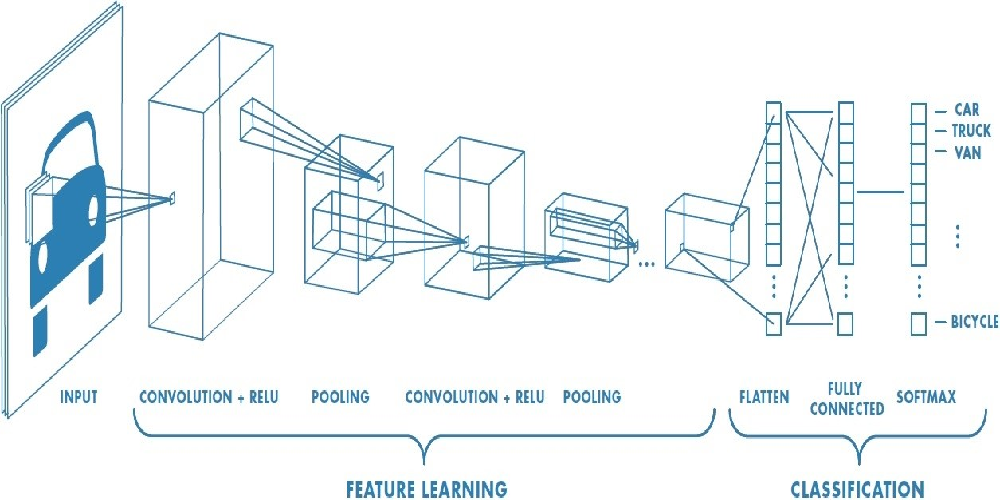

In [72]:
img = image.load_img('cnn구조.jpg', target_size = (500, 1000))
img

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)             

In [37]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [38]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 24s 51ms/step - loss: 0.4769 - accuracy: 0.8275 - val_loss: 0.3423 - val_accuracy: 0.8755
Epoch 2/12
469/469 [==============================] - 24s 50ms/step - loss: 0.3164 - accuracy: 0.8856 - val_loss: 0.3048 - val_accuracy: 0.8859
Epoch 3/12
469/469 [==============================] - 24s 50ms/step - loss: 0.2733 - accuracy: 0.8996 - val_loss: 0.2756 - val_accuracy: 0.8986
Epoch 4/12
469/469 [==============================] - 24s 50ms/step - loss: 0.2497 - accuracy: 0.9069 - val_loss: 0.2648 - val_accuracy: 0.9026
Epoch 5/12
469/469 [==============================] - 24s 50ms/step - loss: 0.2300 - accuracy: 0.9144 - val_loss: 0.2440 - val_accuracy: 0.9079
Epoch 6/12
469/469 [==============================] - 24s 50ms/step - loss: 0.2134 - accuracy: 0.9202 - val_loss: 0.2358 - val_accuracy: 0.9137
Epoch 7/12
469/469 [==============================] - 24s 50ms/step - loss: 0.1989 - accuracy: 0.9258 - val_loss: 0.2331 - val_accuracy:

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)

In [40]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21665316820144653
Test accuracy: 0.923799991607666


In [41]:
predictions2 = model.predict(x_test)

In [43]:
print(predictions2[1])

[1.00688885e-04 9.04654129e-10 9.99815762e-01 1.74398929e-09
 7.63804201e-05 4.93221686e-10 7.09831647e-06 2.09150230e-09
 3.51080720e-09 1.57307378e-09]


In [44]:
print([round(p, 4) for p in predictions2[1]])

[1e-04, 0.0, 0.9998, 0.0, 1e-04, 0.0, 0.0, 0.0, 0.0, 0.0]


In [47]:
y_test[1]#정답

2